In [ ]:
# 1️)나눔글꼴(NanumGothic) 설치
!apt -qq -y install fonts-nanum > /dev/null

# 2️) Matplotlib 캐시 제거 → 새 폰트 인식 강제
import os, shutil
shutil.rmtree(os.path.expanduser('~/.cache/matplotlib'), ignore_errors=True)

# 3️)  Matplotlib / Seaborn 설정 적용
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# 새로 설치한 나눔고딕 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트 등록 및 캐시 강제 리빌드
font_manager.fontManager.addfont(font_path)
try:
    font_manager._load_fontmanager(try_read_cache=False)
except Exception:
    pass

# Matplotlib 기본 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

# Seaborn 테마에도 동일 폰트 적용
sns.set_theme(rc={"font.family": "NanumGothic", "axes.unicode_minus": False})

# 4️) 확인 메시지 출력
print("✅ Colab 한글 폰트(NanumGothic) 설정이 완료되었습니다!")
print("현재 설정된 폰트:", mpl.rcParams['font.family'])
print("NanumGothic 인식 여부:", any('NanumGothic' in f.name for f in font_manager.fontManager.ttflist))
# ======================================================================


✅ Colab 한글 폰트(NanumGothic) 설정이 완료되었습니다!
현재 설정된 폰트: ['NanumGothic']
NanumGothic 인식 여부: True


In [ ]:

# 1. 시가총액 상위 20개 기업 종가 데이터 불러오기
#    (컬럼 = 기업이름, 인덱스 = 날짜)
import pandas as pd

# 시총 상위 20개 기업 종가 데이터
df = pd.read_csv('시총상위 20개 기업 종가.csv', index_col=0, parse_dates=True ,encoding='euc-kr')

print("사용 가능한 기업 목록:")
print(", ".join(df.columns))

def get_valid_name(order):
    """order: 1, 2, 3 번째 기업 안내용"""
    while True:
        name = input(f"{order}번째로 분석할 기업 이름을 입력하세요: ").strip()
        if name in df.columns:
            return name
        else:
            print(f"⚠ '{name}' 은(는) 데이터에 없는 기업입니다. 다시 입력해주세요.")
            print("   → 사용 가능한 기업:", ", ".join(df.columns))

# 하나씩 3개 입력받기
first  = get_valid_name(1)
second = get_valid_name(2)
third  = get_valid_name(3)

selected_names = [first, second, third]

print("\n선택된 기업 3개:", selected_names)



# 3. 선택한 3개 기업의 가격 데이터만 추출
prices = df[selected_names]

# 4. 일별 수익률 계산 (단순수익률)
returns = prices.pct_change().dropna()

# 5. 기대수익률(평균), 표준편차, 상관계수 계산
#    필요하면 *252 해서 연율화도 가능
exp_returns = returns.mean()          # 기대수익률
std_devs    = returns.std()           # 변동성(표준편차)
corr_matrix = returns.corr()          # 상관계수 행렬

print("\n[기대수익률 (일평균)]")
print(exp_returns)

print("\n[표준편차 (일별 변동성)]")
print(std_devs)

print("\n[상관계수 행렬]")
print(corr_matrix)

사용 가능한 기업 목록:
삼성전자, SK하이닉스, LG에너지솔루션, 삼성바이오로직스, 삼성전자우, 현대차, KB금융, 두산에너빌리티, 한화에어로스페이스, HD현대중공업, 기아, SK스퀘어, 셀트리온, NAVER, 신한지주, 삼성물산, 한화오션, 삼성생명, 한국전력, HD현대일렉트릭
1번째로 분석할 기업 이름을 입력하세요: 두산에너빌리티
2번째로 분석할 기업 이름을 입력하세요: 한화오션
3번째로 분석할 기업 이름을 입력하세요: LG에너지솔루션

선택된 기업 3개: ['두산에너빌리티', '한화오션', 'LG에너지솔루션']

[기대수익률 (일평균)]
두산에너빌리티     0.008548
한화오션        0.007062
LG에너지솔루션    0.011371
dtype: float64

[표준편차 (일별 변동성)]
두산에너빌리티     0.052635
한화오션        0.039343
LG에너지솔루션    0.047789
dtype: float64

[상관계수 행렬]
           두산에너빌리티      한화오션  LG에너지솔루션
두산에너빌리티   1.000000  0.003876 -0.025913
한화오션      0.003876  1.000000  0.025319
LG에너지솔루션 -0.025913  0.025319  1.000000


=== Inputs (Daily 기준) ===
     두산에너빌리티: E[R]=0.855%  σ=5.263%
        한화오션: E[R]=0.706%  σ=3.934%
    LG에너지솔루션: E[R]=1.137%  σ=4.779%

Risk-free (daily): 0.0098%  (from 2.5% annual)

=== Tangency Portfolio (Daily) ===
  w_     두산에너빌리티 = 0.254
  w_        한화오션 = 0.349
  w_    LG에너지솔루션 = 0.397
  E[R]_tan  = 0.915%
  σ_tan     = 2.700%
  Sharpe*   = 0.335


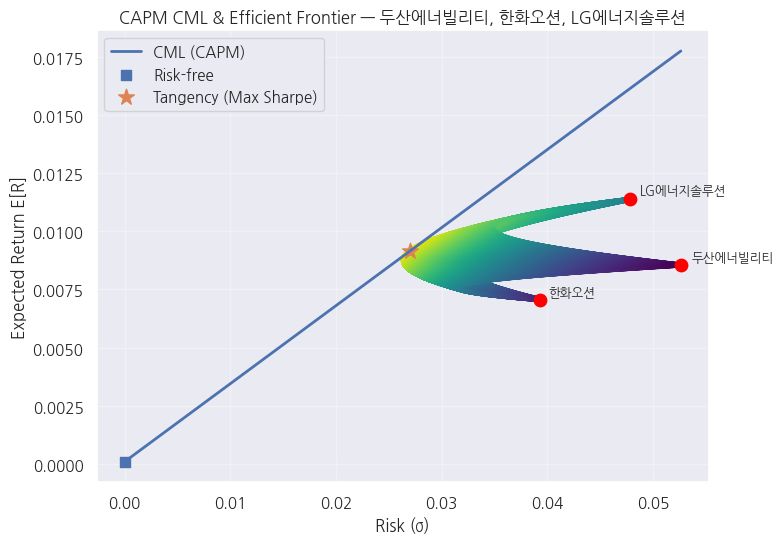


[CML 믹스 예시] target σ = 0.019 → α=0.70,  E[R]=0.644%
  위험자산(탄젠시) 비중 = 70.0%,  무위험자산 비중 = 30.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 0) 전 단계에서 이미 만들어져 있다고 가정하는 것들
# -------------------------------------------------------
# df           : 시총 상위 20개 기업 종가 데이터프레임
# selected_names = ["삼성전자", "SK하이닉스", "NAVER"]  # 예시
# prices       = df[selected_names]
# returns      = prices.pct_change().dropna()

# -------------------------------------------------------
# 1) 기대수익률, 표준편차, 상관계수 (데이터로부터 계산)
# -------------------------------------------------------
ER    = returns.mean().values      # 각 종목 기대수익률 (평균)
sigma = returns.std().values       # 각 종목 변동성 (표준편차)
rho   = returns.corr().values      # 상관계수 행렬

# 공분산 행렬 Σ = D * ρ * D, where D = diag(σ)
S = np.outer(sigma, sigma) * rho

# -------------------------------------------------------
# 2) 무위험수익률 설정
#    연 2.5%라고 가정하고, 일 수익률로 변환 (대략 252거래일 기준)
#    → returns 가 '일별'이면 이렇게, '월별'이면 예제처럼 /12 로 나누면 됨.
# -------------------------------------------------------
rf_annual = 0.025
rf = (1 + rf_annual)**(1/252) - 1   # 일별 무위험수익률 (근사)

# -------------------------------------------------------
# 3) Efficient Frontier & CML (CAPM 그래프)
# -------------------------------------------------------
n_assets = 3
grid_n = 801  # long-only, fully invested 그리드

w_list, R_list, V_list = [], [], []

ws = np.linspace(0, 1, grid_n)
for w1 in ws:
    for w2 in ws:
        w3 = 1.0 - w1 - w2
        if w3 < 0 or w3 > 1:
            continue
        w = np.array([w1, w2, w3])
        mu  = float(w @ ER)              # 포트폴리오 기대수익률
        vol = float(np.sqrt(w @ S @ w))  # 포트폴리오 표준편차
        w_list.append(w); R_list.append(mu); V_list.append(vol)

W = np.array(w_list)
R = np.array(R_list)
V = np.array(V_list)

# -------------------------------------------------------
# 4) 탄젠시 포트폴리오 (Sharpe 최대) & CML
# -------------------------------------------------------
sharpe = (R - rf) / V
idx_tan = np.argmax(sharpe)
w_tan   = W[idx_tan]
R_tan   = R[idx_tan]
V_tan   = V[idx_tan]
SR_tan  = sharpe[idx_tan]

# CML (CAPM의 자본시장선)
sig_line = np.linspace(0, V.max(), 300)
ret_line = rf + SR_tan * sig_line

# -------------------------------------------------------
# 5) 요약 출력
# -------------------------------------------------------
labels = selected_names  # 종목 이름 그대로 사용

print("=== Inputs (Daily 기준) ===")
for i, lb in enumerate(labels):
    print(f"{lb:>12s}: E[R]={ER[i]*100:5.3f}%  σ={sigma[i]*100:5.3f}%")

print("\nRisk-free (daily): {:.4f}%  (from 2.5% annual)".format(rf*100))

print("\n=== Tangency Portfolio (Daily) ===")
for i, lb in enumerate(labels):
    print(f"  w_{lb:>12s} = {w_tan[i]:.3f}")
print("  E[R]_tan  = {:5.3f}%".format(R_tan*100))
print("  σ_tan     = {:5.3f}%".format(V_tan*100))
print("  Sharpe*   = {:5.3f}".format(SR_tan))

# -------------------------------------------------------
# 6) 시각화 (CAPM / CML 그래프)
# -------------------------------------------------------
plt.figure(figsize=(8, 5.6))

# Efficient Frontier 점들 (색: 샤프비율)
plt.scatter(V, R, c=(R - rf)/V, s=8, cmap="viridis")

# CML, 무위험, 탄젠시 포트폴리오
plt.plot(sig_line, ret_line, lw=2, label="CML (CAPM)")
plt.scatter([0],[rf], marker="s", s=60, label="Risk-free")
plt.scatter([V_tan],[R_tan], marker="*", s=140, label="Tangency (Max Sharpe)")

# 개별 자산 표시
for i, lb in enumerate(labels):
    plt.scatter(sigma[i], ER[i], marker='o', color='red', s=80)
    plt.text(sigma[i]*1.02, ER[i]*1.02, lb, fontsize=9)

plt.xlabel("Risk (σ)")
plt.ylabel("Expected Return E[R]")
plt.title(f"CAPM CML & Efficient Frontier — {', '.join(labels)}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 7) CML 상에서 목표 변동성 예시
# -------------------------------------------------------
target_sigma = V_tan * 0.7   # 예: 탄젠시보다 70% 수준 변동성
alpha = target_sigma / V_tan
R_target = rf + alpha * (R_tan - rf)

print("\n[CML 믹스 예시] target σ = {:.3f} → α={:.2f},  E[R]={:.3f}%"
      .format(target_sigma, alpha, R_target*100))
print("  위험자산(탄젠시) 비중 = {:.1f}%,  무위험자산 비중 = {:.1f}%"
      .format(alpha*100, (1-alpha)*100))
